# Machine Learning Workflow
Complete the steps below to complete the machine learning workflow for this classifier.

In [1]:
import nltk
nltk.download(['punkt', 'wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import re
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

def load_data():
    df = pd.read_csv('corporate_messaging.csv', encoding='latin-1')
    df = df[(df["category:confidence"] == 1) & (df['category'] != 'Exclude')]
    X = df.text.values
    y = df.category.values
    return X, y

def tokenize(text):
    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

### Step 1: Load data and perform a train test split

In [4]:
# load data
X, y = load_data()

# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


### Step 2: Train classifier
* Fit and transform the training data with `CountVectorizer`. Hint: You can include your tokenize function in the `tokenizer` keyword argument!
* Fit and transform these word counts with `TfidfTransformer`.
* Fit a classifier to these tfidf values.

In [5]:
# Instantiate transformers and classifier
vect = CountVectorizer(tokenizer=tokenize)
tfidf = TfidfTransformer()
clf = RandomForestClassifier()

# Fit and/or transform each to the data
X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)
clf.fit(X_train_tfidf, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Step 3: Predict on test data
* Transform (no fitting) the test data with the same CountVectorizer and TfidfTransformer
* Predict labels on these tfidf values.

In [6]:
# Transform test data
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)

# Predict test labels
y_pred = clf.predict(X_test_tfidf)


### Step 4: Display results
Display a confusion matrix and accuracy score based on the model's predictions.

In [7]:
# Display a confusion matrix and accuracy score based on the model's predictions
labels = np.unique(y_pred)
confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
accuracy = (y_pred == y_test).mean()

print("Labels:", labels)
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)

Labels: ['Action' 'Dialogue' 'Information']
Confusion Matrix:
 [[ 70   0  25]
 [  1  33   7]
 [ 13   0 452]]
Accuracy: 0.923460898502


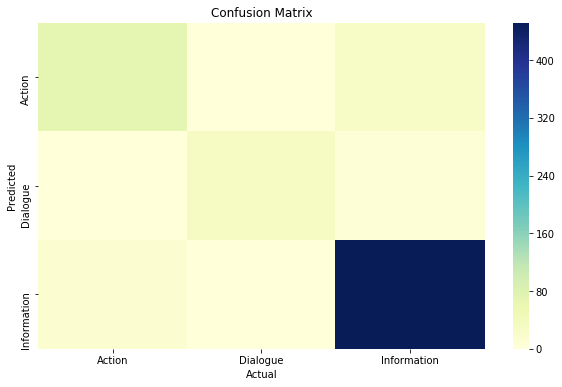

In [8]:
# Create a heatmap for the confusion matrix
confusion_mat_df = pd.DataFrame(confusion_mat, index=labels, columns=labels)

plt.figure(figsize=(10,6))
sns.heatmap(confusion_mat_df, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual');


# Final Step: Refactor
Organize these steps into the following functions.

In [9]:
def display_results(y_test, y_pred):
    '''
    Function to display results of the random forest prediction, 
    including confusion matrix, accuracy score and heatmap.
    Args: y_test = array of actual labels
          y_pred = array of predicted labels
    Returns: None
    '''
    # Display confusion matrix and accuracy score
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)
    
    # Create a heatmap for the confusion matrix
    confusion_mat_df = pd.DataFrame(confusion_mat, index=labels, columns=labels)

    plt.figure(figsize=(10,6))
    sns.heatmap(confusion_mat_df, cmap="YlGnBu")
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual');
    

def main():
    '''
    Function to load, instantiate transformers and classifiers,
    fit and transform them and predict labels. Calls the display_results function.
    Args: None
    Returns: None
    '''
    # Load data
    X, y = load_data()
    # Perform train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # Instantiate transformers and classifier
    vect = CountVectorizer(tokenizer=tokenize)
    tfidf = TfidfTransformer()
    clf = RandomForestClassifier()

    # Fit and/or transform each to the data
    X_train_counts = vect.fit_transform(X_train)
    X_train_tfidf = tfidf.fit_transform(X_train_counts)
    clf.fit(X_train_tfidf, y_train)
    
    # Transform test data
    X_test_counts = vect.transform(X_test)
    X_test_tfidf = tfidf.transform(X_test_counts)

    # Predict test labels
    y_pred = clf.predict(X_test_tfidf)
    
    # Display confusion matrix, accuracy score and heatmap
    display_results(y_test, y_pred)
    
    

Labels: ['Action' 'Dialogue' 'Information']
Confusion Matrix:
 [[ 75   0  20]
 [  1  31   9]
 [ 12   0 453]]
Accuracy: 0.930116472546


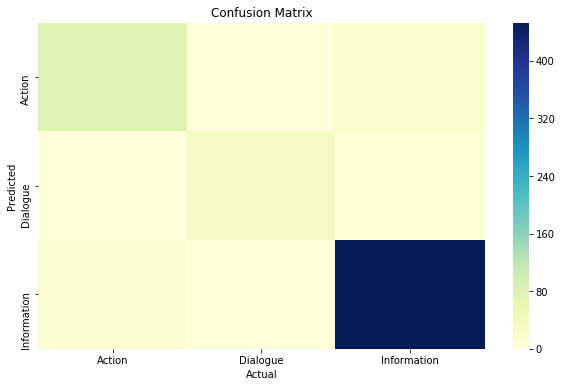

In [10]:
# run program
main()